# SCATTER Plotting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

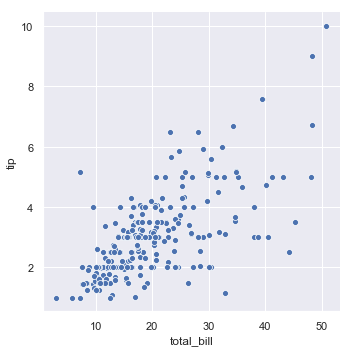

In [3]:
#load data and plot default scatter
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips)

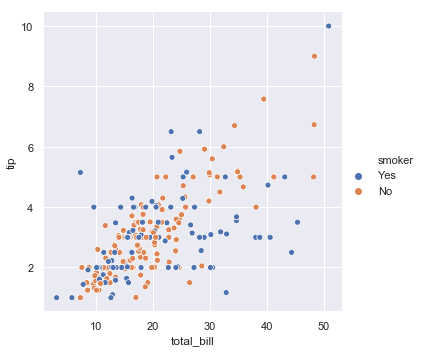

In [4]:
# Added hue thats like a third parameter seperator, interesting !!
#1 st scemantic variable HUE
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

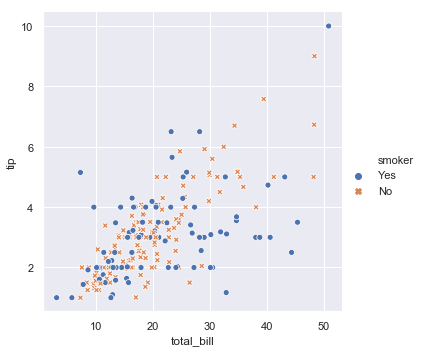

In [5]:
#give smoker a style so we can have better visibility 
# this is 2nd scementic variable STYLE
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips)

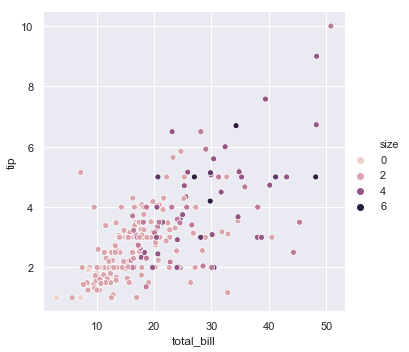

In [6]:
#In the examples above, the hue semantic was categorical, so the default qualitative 
#palette was applied. #If the hue semantic is numeric (specifically, if it can be cast to float),
#the default coloring switches to a sequential palette:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

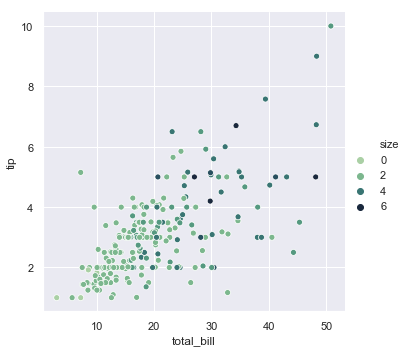

In [7]:
#In both cases, you can customize the color palette. There are many options for doing so. Here, we customize a sequential palette using the string 
#interface to cubehelix_palette():

sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips);

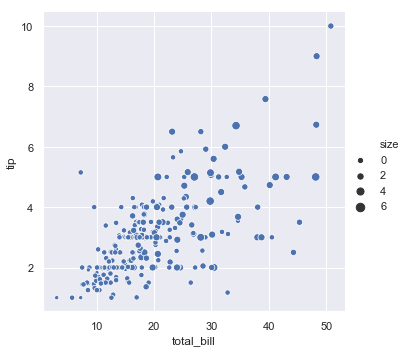

In [8]:
#The third kind of semantic variable  SIZE   changes the size of each point:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

#REFER the link for more plotting on scatter https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

# Line Plotting

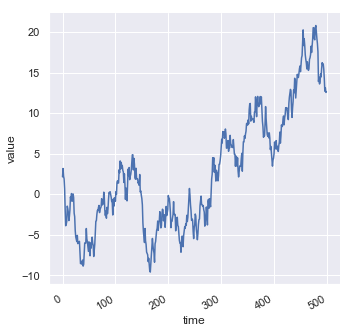

In [11]:
df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()  # add tics to major x labels

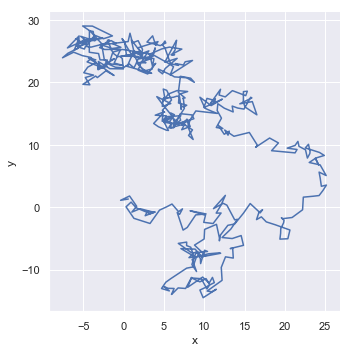

In [12]:
#by default x will be sorted , if you do not want sorting then this is what you can use
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

Aggregation and representing uncertainty

More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:

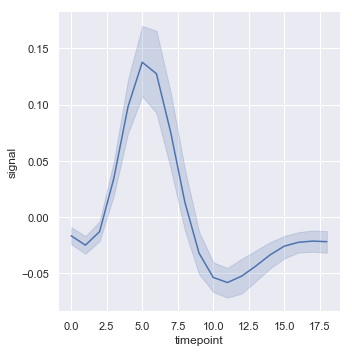

In [13]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

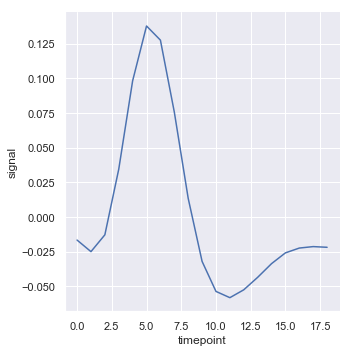

In [14]:
#The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them:

sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

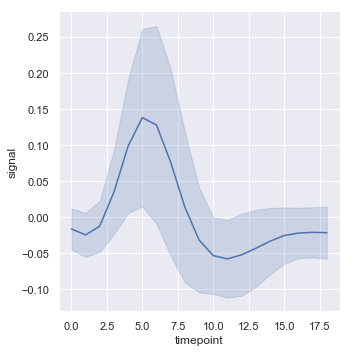

In [15]:
# Another good option, especially with larger data, is to represent the spread of the distribution at each 
#timepoint by plotting the standard deviation instead of a confidence interval:

sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

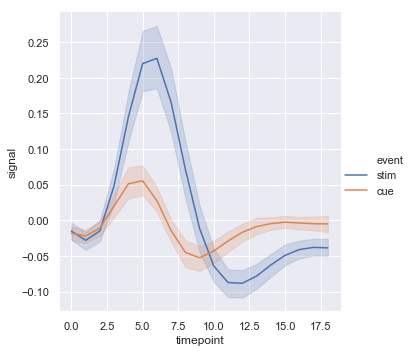

In [16]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

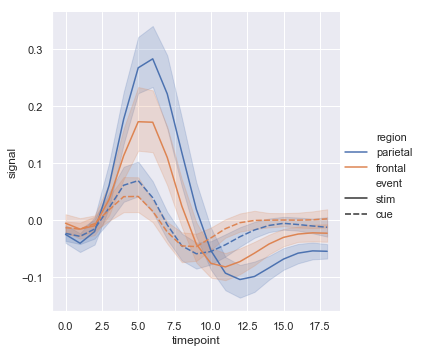

In [17]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

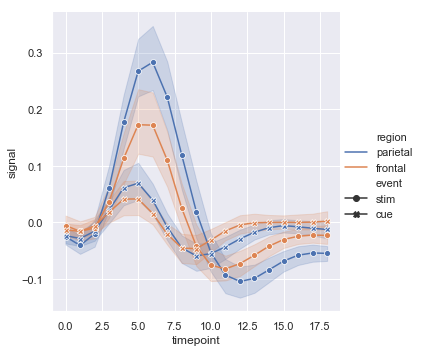

In [18]:
#But you can identify subsets by the markers used at each observation, either together with the dashes or instead of them:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

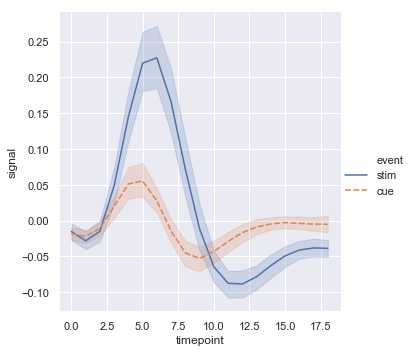

In [19]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            kind="line", data=fmri);

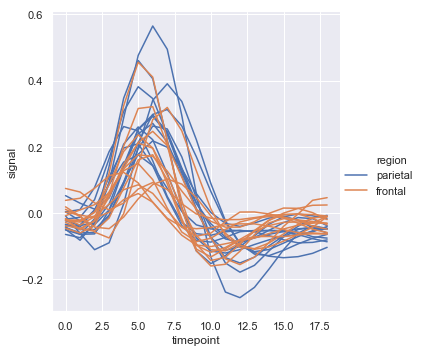

In [20]:
#When you are working with repeated measures data (that is, you have units that were sampled multiple times), 
#you can also plot each sampling unit separately without 
#distinguishing them through semantics. This avoids cluttering the legend:
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"));

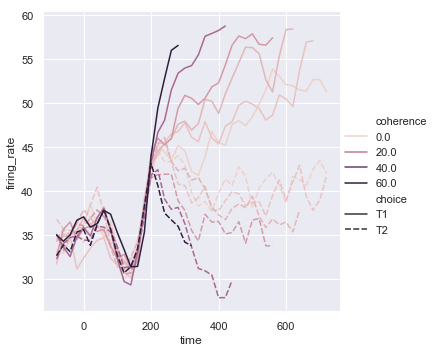

In [21]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);


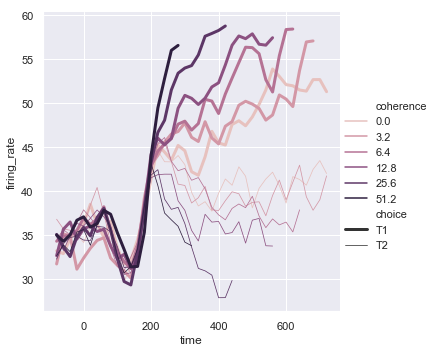

In [25]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots);

Plotting the Date Data

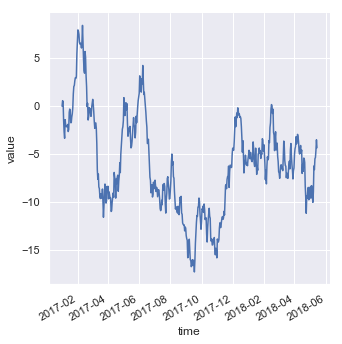

In [26]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

Showing multiple relationships with facets

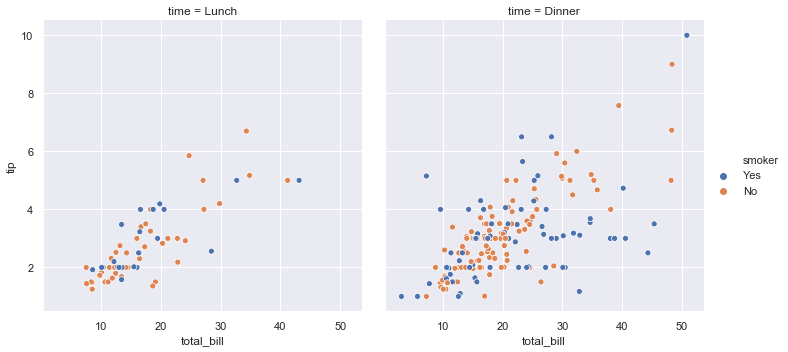

In [27]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

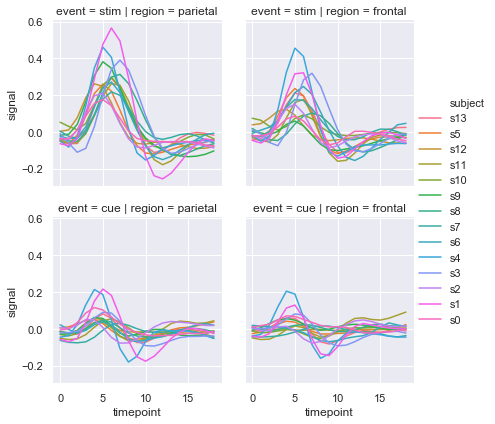

In [28]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

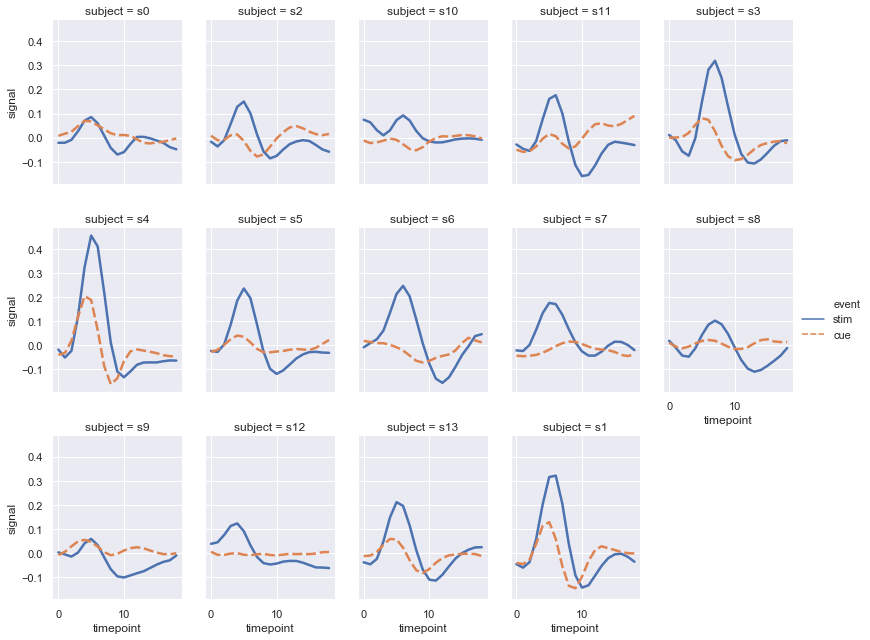

In [29]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

# Other Categorical plotting methods

Categorical scatterplots:
----------------------------------------

stripplot() (with kind="strip"; the default)

swarmplot() (with kind="swarm")

Categorical distribution plots:
------------------------------------------
boxplot() (with kind="box")

violinplot() (with kind="violin")

boxenplot() (with kind="boxen")

Categorical estimate plots:
---------------------------------------
pointplot() (with kind="point")

barplot() (with kind="bar")

countplot() (with kind="count")

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

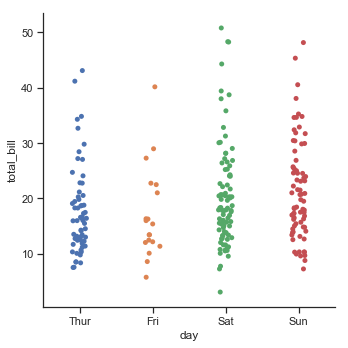

In [31]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips);

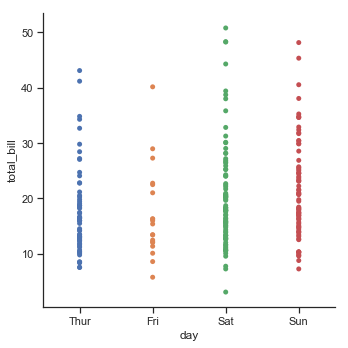

In [32]:
#The jitter parameter controls the magnitude of jitter or disables it altogether:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

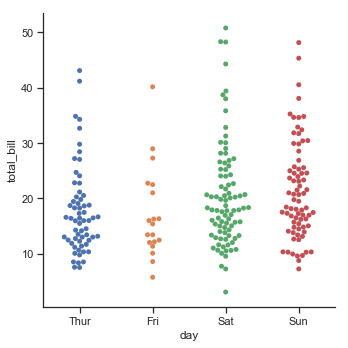

In [33]:
#The second approach adjusts the points along the categorical axis using an algorithm that prevents them from overlapping.

sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

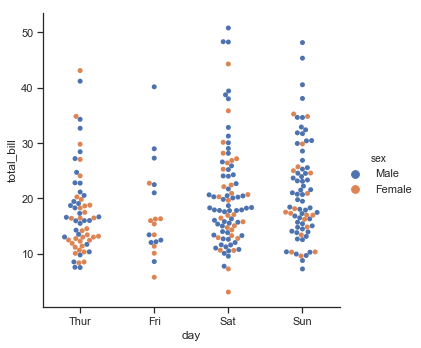

In [34]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

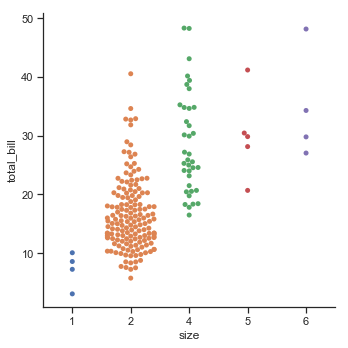

In [35]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"));

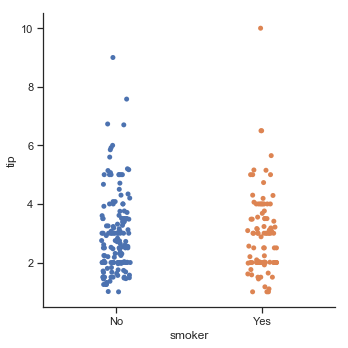

In [36]:
#The other option for chosing a default ordering is to take the levels of the category as they appear in the dataset
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

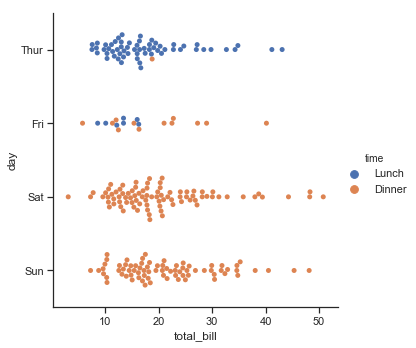

In [37]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

Distributions of observations within categories
---------------------------------------------------------------------



The first is the familiar boxplot(). This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

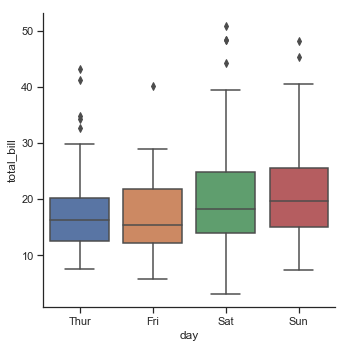

In [38]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

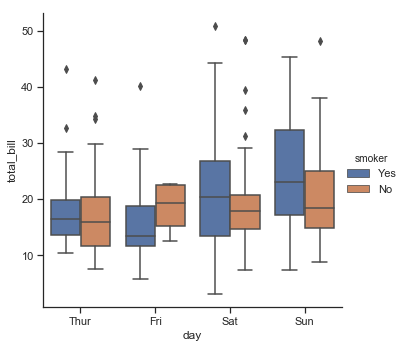

In [39]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

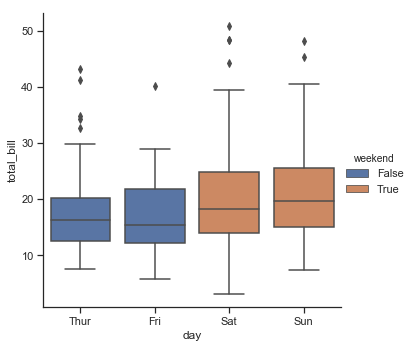

In [40]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips);

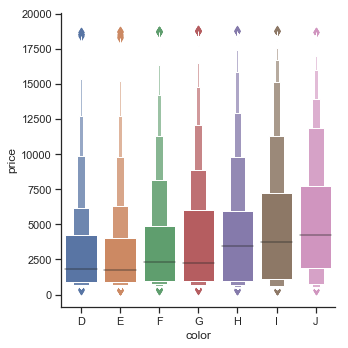

In [41]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"));

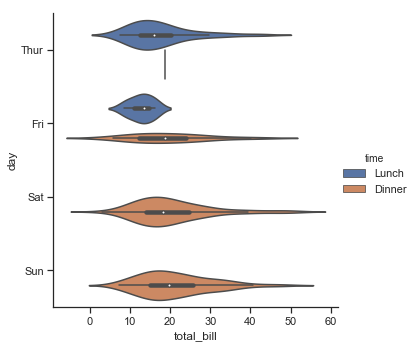

In [42]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips);

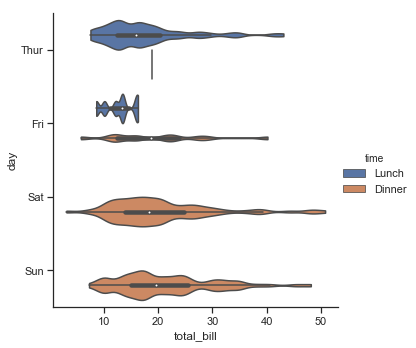

In [43]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", bw=.15, cut=0,
            data=tips);

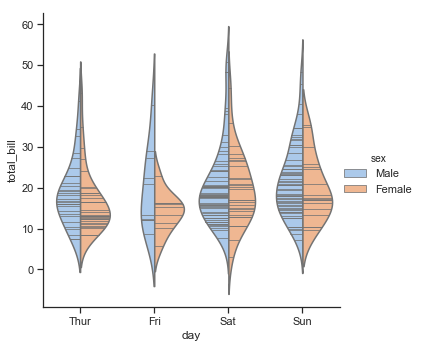

In [44]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

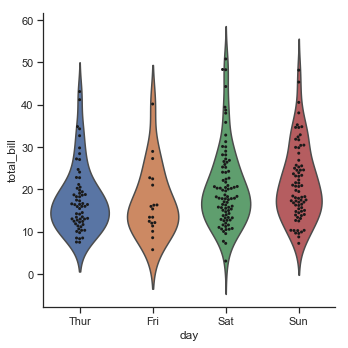

In [45]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

# Statistical estimation within categories

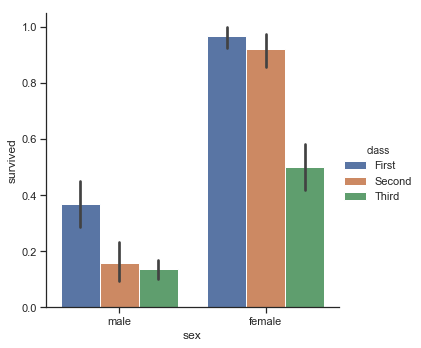

In [46]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

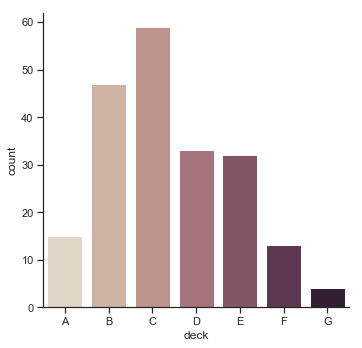

In [47]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

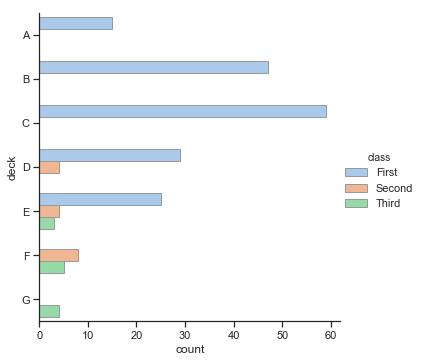

In [48]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);

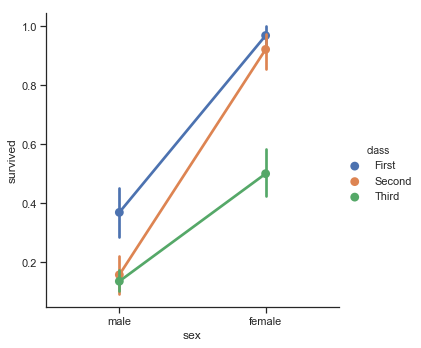

In [49]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

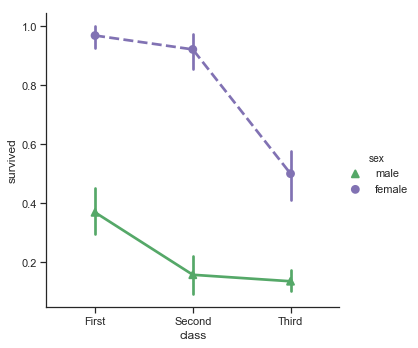

In [50]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);

# Visualizing the distribution of a dataset

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(color_codes=True)

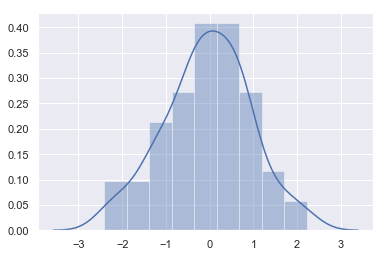

In [53]:
x = np.random.normal(size=100)
sns.distplot(x);

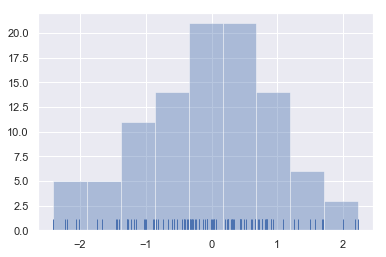

In [54]:
sns.distplot(x, kde=False, rug=True);

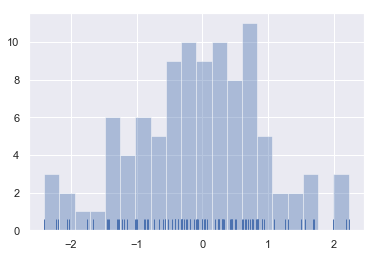

In [55]:
sns.distplot(x, bins=20, kde=False, rug=True);

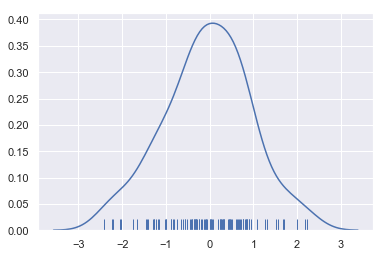

In [56]:
sns.distplot(x, hist=False, rug=True);

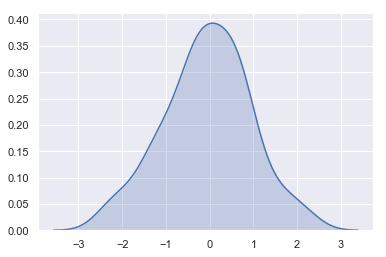

In [57]:
sns.kdeplot(x, shade=True);

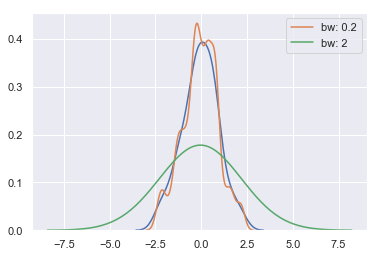

In [58]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

# sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

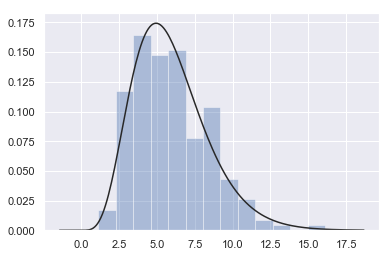

In [60]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

Plotting bivariate distributions

In [61]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

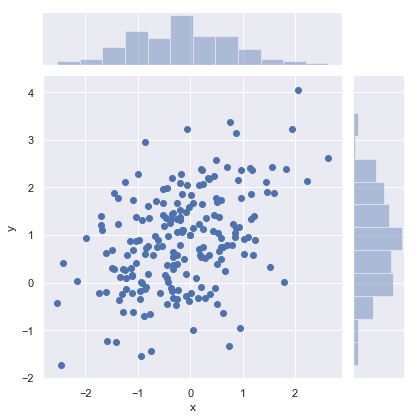

In [62]:
sns.jointplot(x="x", y="y", data=df);

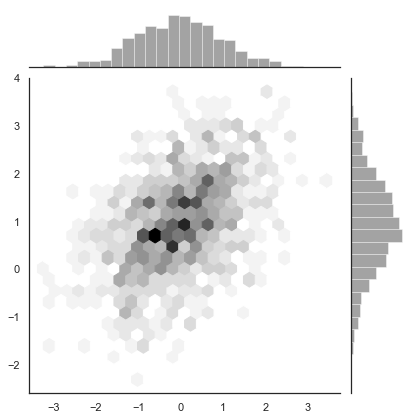

In [63]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

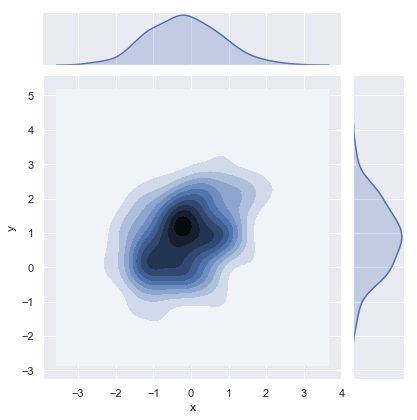

In [64]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

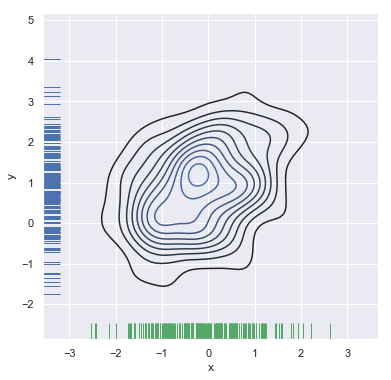

In [65]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

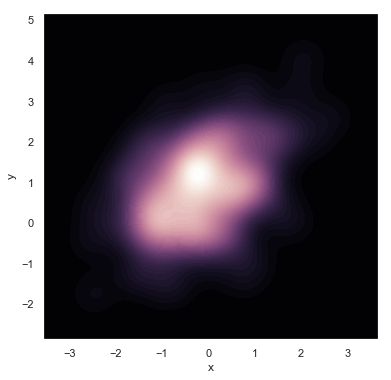

In [66]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

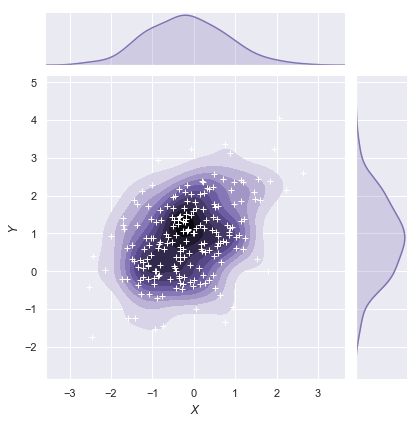

In [67]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

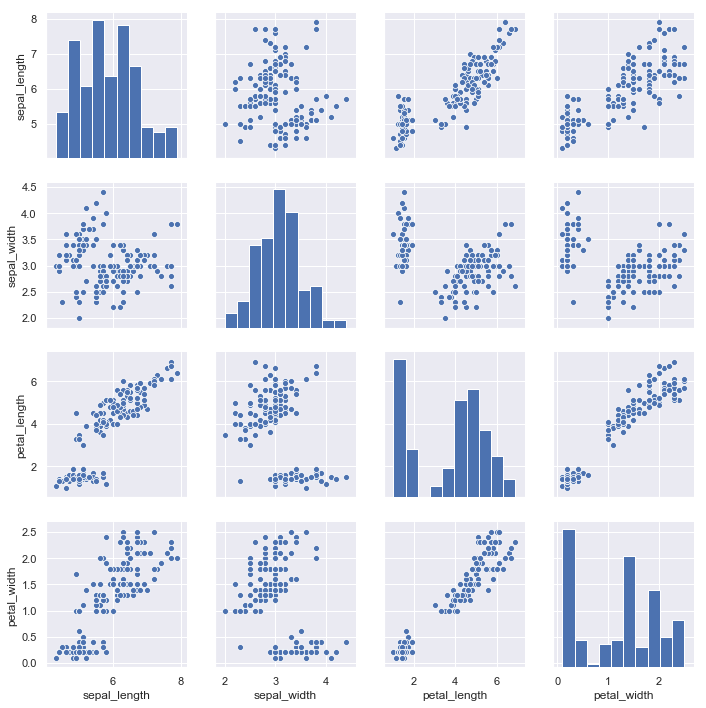

In [68]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

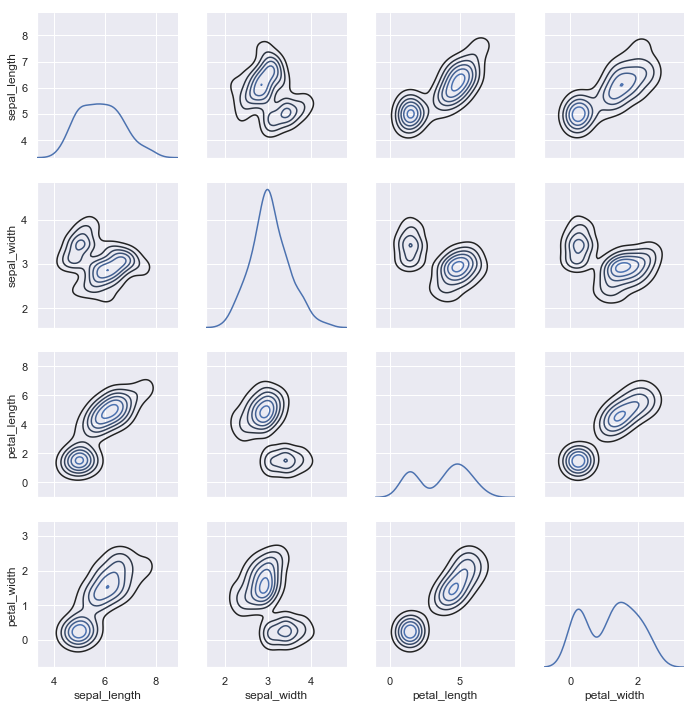

In [69]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

# Visualizing linear relationships

In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

tips = sns.load_dataset("tips")

Functions to draw linear regression models

Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, regplot() and lmplot() are closely related, and share much of their core functionality. It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for particular job.

In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:

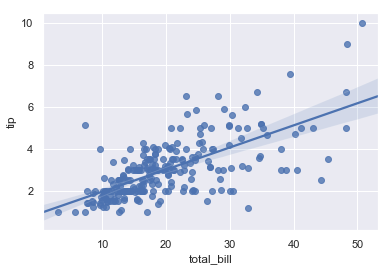

In [71]:
sns.regplot(x="total_bill", y="tip", data=tips);

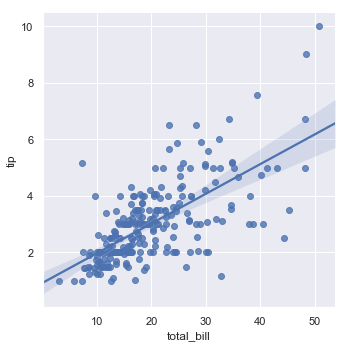

In [72]:
sns.lmplot(x="total_bill", y="tip", data=tips);

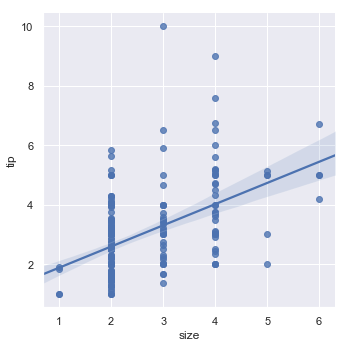

In [73]:
sns.lmplot(x="size", y="tip", data=tips);

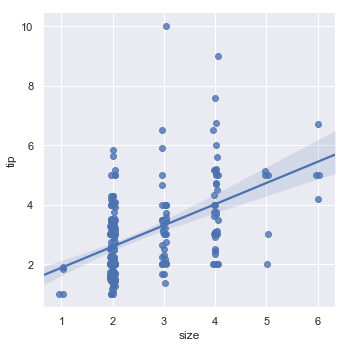

In [74]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

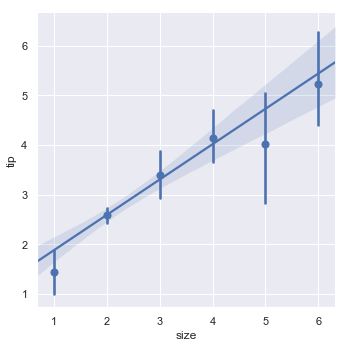

In [75]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

In [76]:
anscombe = sns.load_dataset("anscombe")
anscombe


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


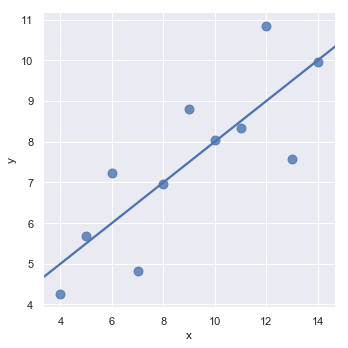

In [77]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

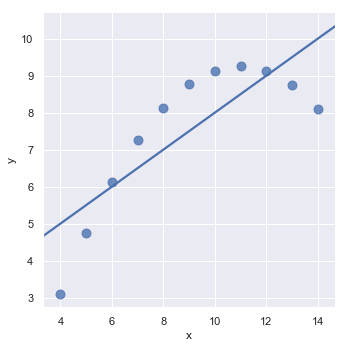

In [78]:
#this is not a good fit
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

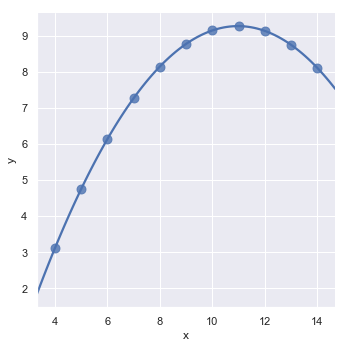

In [83]:
#fit polynomial
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

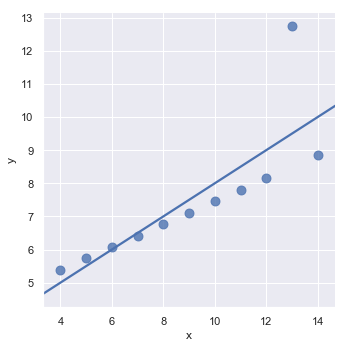

In [84]:
#A different problem is posed by “outlier” observations that deviate for some reason 
#other than the main relationship under study:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

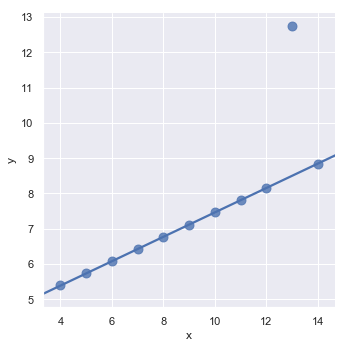

In [85]:
#In the presence of outliers, it can be useful to fit a robust regression, 
#which uses a different loss function to downweight relatively large residuals:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});


for more details on regression https://seaborn.pydata.org/tutorial/regression.html

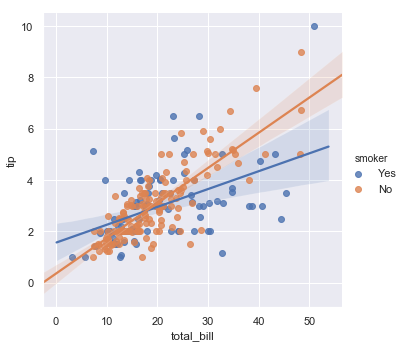

In [86]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

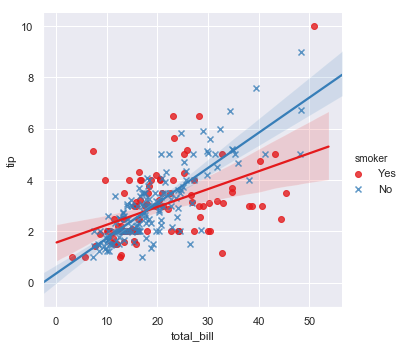

In [87]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

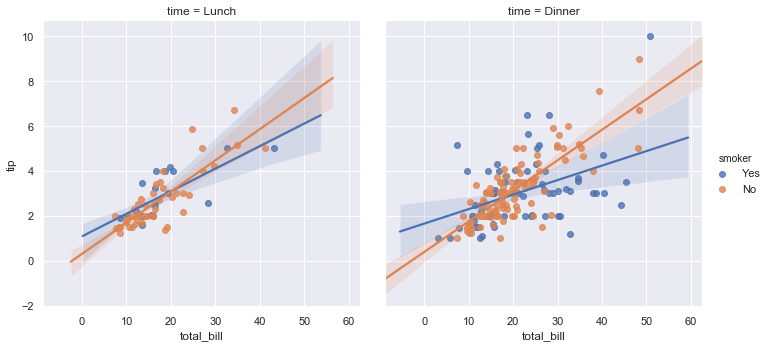

In [88]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

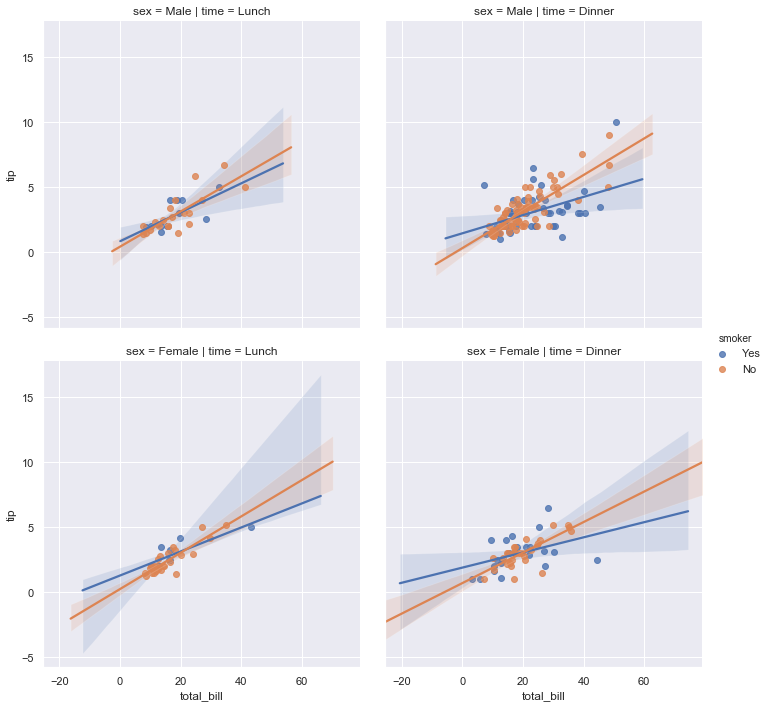

In [90]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);